<a href="https://colab.research.google.com/github/abuelnasr0/Cats-Vs-Dogs_classification/blob/main/cats_VS_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import os

#Load the cats VS dogs Dataset

In [2]:
!gdown 1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
!gdown 1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
!gdown 1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
!gdown 1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN

!unzip /content/cats_test.zip
!unzip /content/cats_train.zip
!unzip /content/dogs_test.zip
!unzip /content/dogs_train.zip

Downloading...
From: https://drive.google.com/uc?id=1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
To: /content/cats_test.zip
100% 10.2M/10.2M [00:00<00:00, 30.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
To: /content/cats_train.zip
100% 21.1M/21.1M [00:00<00:00, 46.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
To: /content/dogs_test.zip
100% 11.8M/11.8M [00:00<00:00, 34.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN
To: /content/dogs_train.zip
100% 24.5M/24.5M [00:00<00:00, 32.4MB/s]
Archive:  /content/cats_test.zip
   creating: cats_and_dogs_small/test/cats/
  inflating: cats_and_dogs_small/test/cats/cat.1699.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1502.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1984.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1612.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1658.jpg  
  inflating: ca

In [4]:
cats_train_path = "/content/cats_and_dogs_small/train/cats"
cats_test_path = "/content/cats_and_dogs_small/test/cats"
dogs_train_path = "/content/cats_and_dogs_small/train/dogs"
dogs_test_path = "/content/cats_and_dogs_small/test/dogs"
train_dir = "/content/cats_and_dogs_small/train/"
testing_dir = "/content/cats_and_dogs_small/test/"

cats_train_images = [f for f in os.listdir(cats_train_path)]
cats_test_images = [f for f in os.listdir(cats_test_path)]
dogs_train_images = [f for f in os.listdir(dogs_train_path)]
dogs_test_images = [f for f in os.listdir(dogs_test_path)]

print(len(cats_train_images))
print(len(cats_test_images))
print(len(dogs_train_images))
print(len(dogs_test_images))

1000
500
1000
500


# Data Augmantation & Data genrator

In [5]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        testing_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Exploratory Data Analysis

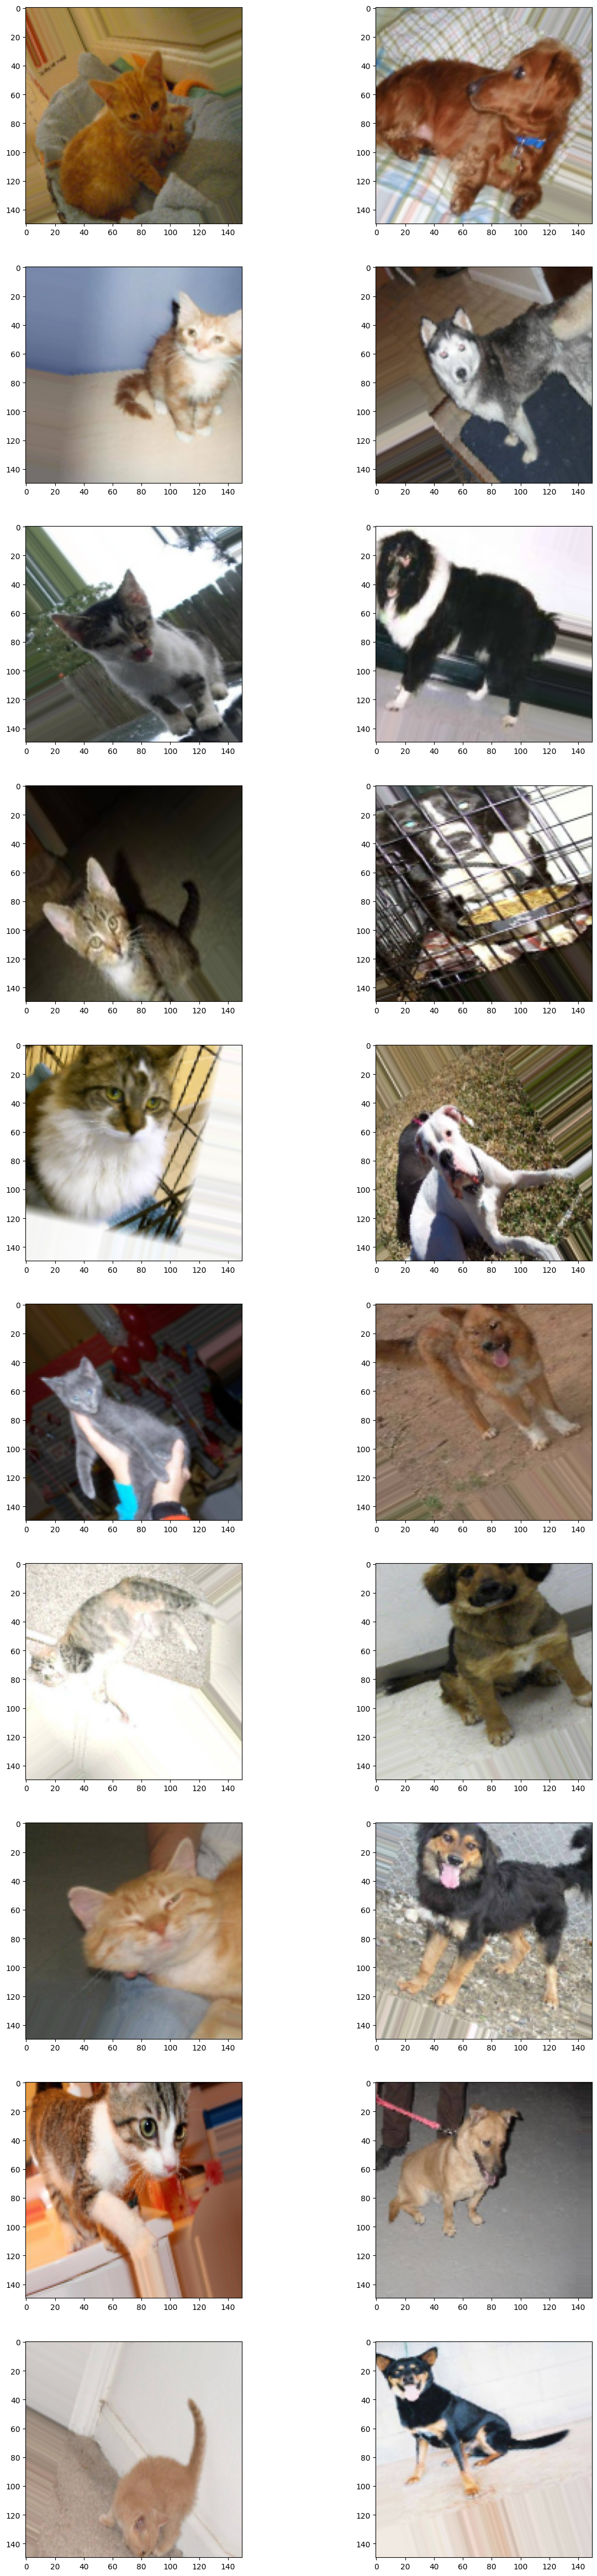

In [6]:
x= 0 ; y= 0
f, axis = plt.subplots(10,2, figsize=(15, 60))
for images, label in train_generator:
  cat_mask = label == 0.0
  dog_mask = ~cat_mask

  cat_images = images[cat_mask]
  dog_images = images[dog_mask]

  if(y>=10 and x>=10):
    break

  for cat_image in cat_images:
    if(x >= 10):
      break
    axis[x,0].imshow(cat_image)
    x+=1

  for dog_image in dog_images:
    if(y >= 10):
      break
    axis[y,1].imshow(dog_image)
    y+=1




#Data preproceesing

# Build The model.

In [15]:
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import AdamW
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=train_generator.next()[0].shape[1:]))
model.add(MaxPooling2D((2, 2), 2))
model.add(Dropout(.2))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), 2))
model.add(Dropout(.2))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), 2))
model.add(Dropout(.2))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), 2))
model.add(Dropout(.2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.compile(optimizer="rmsprop",
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 36, 36, 64)       

# Train The Model

In [16]:
earlystopping_callback = EarlyStopping(  monitor="val_loss", patience=8,)

history = model.fit(
          train_generator ,epochs=30,
          validation_data=validation_generator, callbacks=[earlystopping_callback],)

Epoch 1/30
32/32 [==============================] - 22s 637ms/step - loss: 0.9250 - accuracy: 0.5065 - val_loss: 0.6930 - val_accuracy: 0.5010
Epoch 2/30
32/32 [==============================] - 20s 628ms/step - loss: 0.6947 - accuracy: 0.5140 - val_loss: 0.6900 - val_accuracy: 0.5920
Epoch 3/30
32/32 [==============================] - 19s 604ms/step - loss: 0.6937 - accuracy: 0.5210 - val_loss: 0.6885 - val_accuracy: 0.5560
Epoch 4/30
32/32 [==============================] - 20s 642ms/step - loss: 0.6909 - accuracy: 0.5360 - val_loss: 0.6858 - val_accuracy: 0.5390
Epoch 5/30
32/32 [==============================] - 20s 616ms/step - loss: 0.6907 - accuracy: 0.5690 - val_loss: 0.7197 - val_accuracy: 0.5170
Epoch 6/30
32/32 [==============================] - 21s 670ms/step - loss: 0.6595 - accuracy: 0.6150 - val_loss: 0.6936 - val_accuracy: 0.5830
Epoch 7/30
32/32 [==============================] - 24s 747ms/step - loss: 0.6876 - accuracy: 0.6100 - val_loss: 0.6577 - val_accuracy: 0.5940

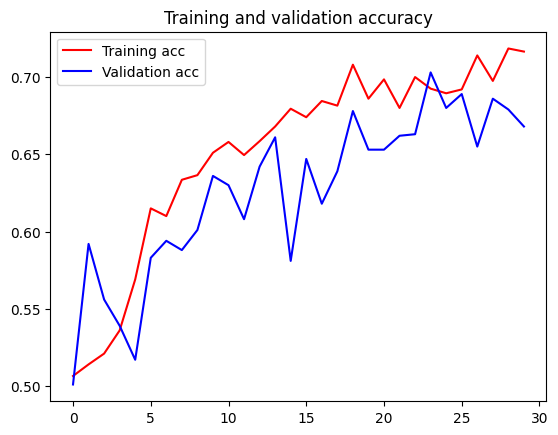

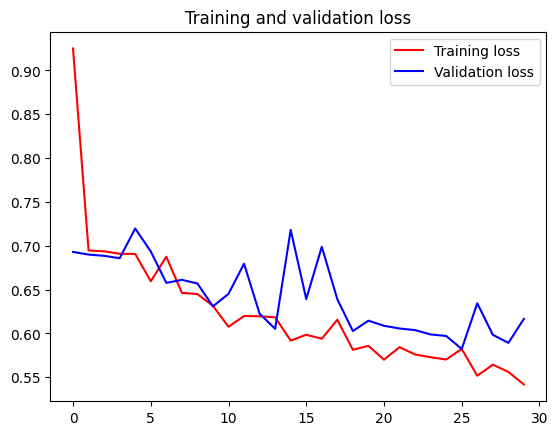

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()